##Section: More comprehensive and useful examples
A more useful script to read a data file.
The format is a csv file.

In [4]:
import csv  #to load a module that helps with loading csv files


datafilename = '4-1_FakeAnimalData.csv'

# one way of doing this is to just append the data to different lists
ratID = []
Ntriallist = []
Nsuccesslist = []
with open(datafilename, newline='') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    #we can skip the header row
    next(filereader, None)

    #now loop through the rest of the file and print the data
    for row in filereader:
        print(row)
        #join.row connects all of the data together for formatting
        ratID.append(row[0])
        Ntriallist.append(float(row[3])) #If we know these are numerical values, convert them to a float
        Nsuccesslist.append(float(row[4]))
        print(ratID)
        print(Ntriallist)
        print(Nsuccesslist)
        print()




['123', '1/12/23', 'ladderwalk', '10', '8']
['123']
[10.0]
[8.0]

['456', '2/12/23', 'ladderwalk', '11', '3']
['123', '456']
[10.0, 11.0]
[8.0, 3.0]

['789', '3/12/23', 'ladderwalk', '12', '7']
['123', '456', '789']
[10.0, 11.0, 12.0]
[8.0, 3.0, 7.0]



In [5]:
#Now let's do some calculations from the data
SuccessRate = []
print('Final calculations on list')
for s in range(0,len(ratID)):
  SuccessRate.append(Nsuccesslist[s] / Ntriallist[s] * 100)

print(SuccessRate)
MeanSuccessRate = sum(SuccessRate) / len(SuccessRate)
print('Mean success rate is ',MeanSuccessRate)

Final calculations on list
[80.0, 27.27272727272727, 58.333333333333336]
Mean success rate is  55.2020202020202


In [8]:
# Read excel spreadsheets using panadas dataframes. Easier and more functionality.
import pandas as pd


datafilename = '4-1_FakeAnimalData.csv'
data = pd.read_csv(datafilename, delimiter=',')
print(data)

print()


# or we can use excel data directly with pandas
datafilename = '4-1_FakeAnimalData.xlsx'

data = pd.read_excel(datafilename)
print (data)



   Rat     date        test  Ntrials  Nsuccessful
0  123  1/12/23  ladderwalk       10            8
1  456  2/12/23  ladderwalk       11            3
2  789  3/12/23  ladderwalk       12            7

   Rat       date        test  Ntrials  Nsuccessful
0  123 2023-01-12  ladderwalk       10            8
1  456 2023-02-12  ladderwalk       11            3
2  789 2023-03-12  ladderwalk       12            7


For many functions, you can include additional arguments to change the behavior from default settings.
More about functions and how to use them for this example.
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html


In [10]:

# use dataframes to be more efficient in calculations
# add another column calculated from the other data
data["SuccessRate"] = data["Nsuccessful"] / data["Ntrials"] * 100
print(data)

MeanSuccessRate = data["SuccessRate"].mean()
print('Mean success rate is ',MeanSuccessRate)



   Rat       date        test  Ntrials  Nsuccessful  SuccessRate
0  123 2023-01-12  ladderwalk       10            8    80.000000
1  456 2023-02-12  ladderwalk       11            3    27.272727
2  789 2023-03-12  ladderwalk       12            7    58.333333
Mean success rate is  55.2020202020202


Note about lists and dataframes:

Lists are very often used in python and sometimes functions only accept lists.  They are very helpful for looping though things, for example a list of filenames.

Dataframes are very useful if your data is well-formatted, ie, if you typically use spreadsheets.
Both are important to learn.

In [ ]:
#Using functions.  You can define a function to do things that you do repeatedly.
# it is not essential, but makes for cleaner and more reusable code.

def calcSuccessAndAverage(datafile, sheet):
  # note that datafile and sheetname are different variables than datafilename and sheetname.
  # they only exist within this function. They have 'scope' only here.
  data = pd.read_excel(datafile, sheet_name=sheet)
  data["SuccessRate"] = data["Nsuccessful"] / data["Ntrials"] * 100
  MeanSuccessRate = data["SuccessRate"].mean()
  return MeanSuccessRate


datafilename = '4-1_FakeAnimalData.xlsx'

sheetname = "ladderwalk"
meanval = calcSuccessAndAverage(datafilename, sheetname)
print('Mean success rate of', sheetname, 'is' ,meanval)

sheetname = "ladderwalk2"
meanval = calcSuccessAndAverage(datafilename, sheetname)
print('Mean success rate of', sheetname, 'is' ,meanval)

## Here is some real data from the behavioral core:

In [14]:
# first just use the default settings to load the excel file
datafilename = '4-1_Sterrett 10.5.2021-1.5.2022 SCP-1 3 Dose WT Male & Female Tetrad.xlsx'

data = pd.read_excel(datafilename)
print (data) #note we have name NaN data and it didn't capture the correct row/headers for our data.

       Sex   Animal Treatment         DOB Drug Creation Date Date Tested   \
0   Female       87      WT-A    9.4.2021     12.14.2021 CJH   12.14.2021   
1   Female  BQ472 2      WT-A   9.14.2021     12.14.2021 CJH   12.14.2021   
2   Female  BQ472 5      WT-A   9.14.2021     12.14.2021 CJH   12.14.2021   
3   Female  BF482 3      WT-A   9.15.2021     12.14.2021 CJH   12.14.2021   
4   Female      CGN      WT-A   10.2.2021        1.3.2022 AD     1.4.2022   
5   Female      CGN      WT-A   10.2.2021        1.3.2022 AD     1.4.2022   
6   Female      140      WT-A   10.4.2021        1.3.2022 AD     1.4.2022   
7   Female      156      WT-A  10.11.2021        1.3.2022 AD     1.4.2022   
8   Female      111      WT-A   9.21.2021        1.3.2022 AD     1.5.2021   
9   Female  BY435 1      WT-A  10.13.2021        1.3.2022 AD     1.5.2021   
10  Female       88      WT-B    9.4.2021     12.14.2021 CJH   12.14.2021   
11  Female  BQ472 3      WT-B   9.14.2021     12.14.2021 CJH   12.14.2021   

In [15]:
groupeddata = data.groupby('Sex')
average_bySex = groupeddata.mean(numeric_only=True)
print('Means')
print(average_bySex)
std_bySex = groupeddata.std(numeric_only=True)
print('Standard Deviations')
print(std_bySex)

Means
         Distance  Mean speed  Time freezing  Time mobile  Time immobile  \
Sex                                                                        
Female  39.149633    0.043400     151.083333   545.746667     354.253333   
Male    39.409867    0.043733     105.253333   571.823333     328.176667   

        Inner Zone : entries  Inner Zone : time  Inner Zone : distance  \
Sex                                                                      
Female            167.466667         551.523333              27.514433   
Male              166.500000         511.000000              25.467933   

        Inner Zone : average speed  Inner Zone : max visit  ...  \
Sex                                                         ...   
Female                    0.050200               61.803333  ...   
Male                      0.049067               52.886667  ...   

        Outer Zone : average speed  Outer Zone : max visit  \
Sex                                                          

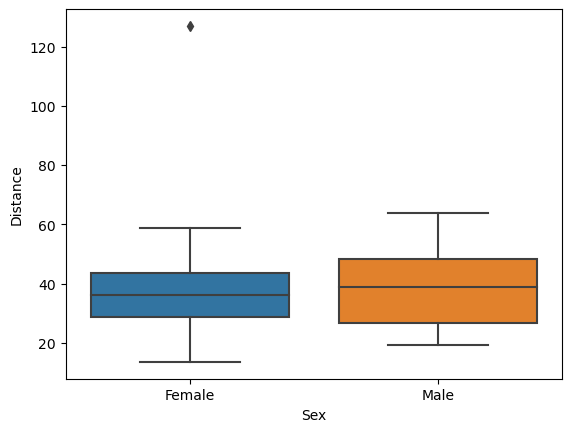

In [16]:
## quick box plotting.
# googled for "python box plot by group"
# https://www.geeksforgeeks.org/grouped-boxplots-in-python-with-seaborn/


import seaborn as sns

# create grouped boxplot
ax = sns.boxplot(y = data['Distance'],
              x = data['Sex'])


Text(0.5, 0, 'Sex')

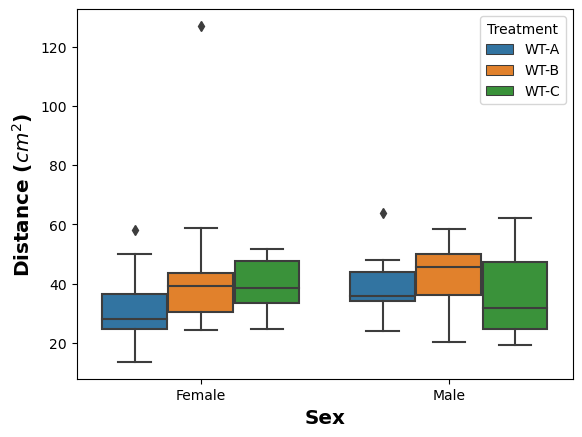

In [17]:
import matplotlib.pyplot as plt

ax = sns.boxplot(y = data['Distance'],
              x = data['Sex'],
              hue = data['Treatment'])

ax.set_ylabel("Distance ($cm^2$)",fontsize='x-large',fontweight='bold') #note this uses a strange $ to get the exponent to display
ax.set_xlabel("Sex",fontsize='x-large',fontweight='bold')

Text(0.5, 0, 'Treatment')

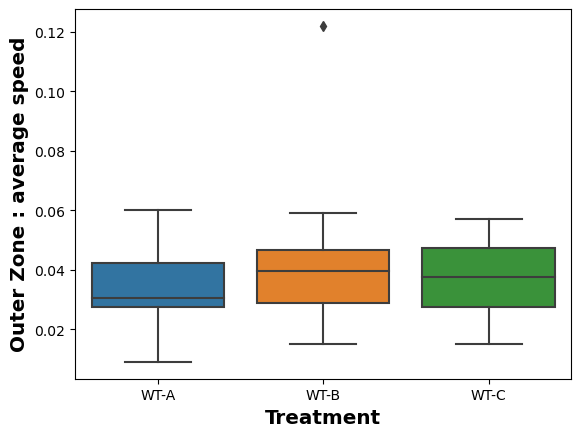

In [19]:
# prompt: plot data by treatment for outer zone time

# create grouped boxplot
ax = sns.boxplot(y = data['Outer Zone : average speed'],
              x = data['Treatment'])

ax.set_ylabel("Outer Zone : average speed",fontsize='x-large',fontweight='bold') #note this uses a strange $ to get the exponent to display
ax.set_xlabel("Treatment",fontsize='x-large',fontweight='bold')
